## Support Vector Machine (SVM)

In [78]:
from sklearn.datasets import load_iris
import numpy as np

In [79]:
iris = load_iris()

In [80]:
X = iris['data']
y = iris['target']

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [83]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [84]:
y_versi_train = (y_train == 1)
y_versi_test = (y_test == 1)

### Condition and drawbacks on using SVM
    1- only Binary Classifers
    2- Taking care of Scaling

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [86]:
lin_svm = Pipeline([('scalar',StandardScaler()),('lin_svm', LinearSVC())])

In [87]:
lin_svm.fit(X_train, y_versi_train)

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_svm', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [88]:
y_versi_test_pred = lin_svm.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error

In [90]:
y_versi_test_pred = np.array(y_versi_test_pred,dtype = np.int8)
np.sqrt(mean_squared_error(y_versi_test_pred, y_versi_test))

0.408248290463863

## Non-Linear SVM

In [91]:
from sklearn.datasets import make_moons

In [92]:
X,y = make_moons(n_samples=100,shuffle=True,noise=0.20,random_state=42)

In [93]:
import matplotlib.pyplot as plt

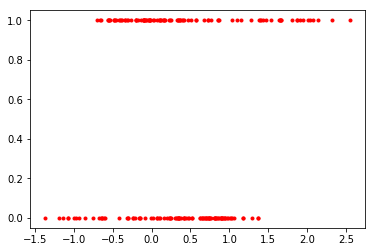

In [94]:
plt.plot(X,y,'r.')

In [95]:
from sklearn.svm import SVC

In [96]:
poly_svm = Pipeline([('scalar',StandardScaler()),('poly_svm',SVC(kernel='poly',degree=5))])

In [97]:
poly_svm.fit(X,y)

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('poly_svm', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=5, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [98]:
poly_svm.predict(X[10:20])

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0], dtype=int64)

In [107]:
y[10:20]

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

### Combine Classifers

## Combining classifers using VotingClassifers

In [100]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [110]:
log_reg = LogisticRegression()
lin_svm = LinearSVC()
dec_tree = DecisionTreeClassifier()

In [111]:
voting_clf = VotingClassifier(estimators=[('log_reg',log_reg),('lin_svm',lin_svm),('dec_tree',dec_tree)], voting = 'hard')

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
for clf in (log_reg, lin_svm, dec_tree,voting_clf):
    clf.fit(X,y)
    y_pred = clf.predict(X[40:60])
    print(clf.__class__.__name__, 'accuracy',accuracy_score(y[40:60],y_pred))

C:\Users\Amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Amey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression accuracy 0.85
LinearSVC accuracy 0.85
DecisionTreeClassifier accuracy 1.0
VotingClassifier accuracy 0.85


In [ ]:
import tensorflow as tf